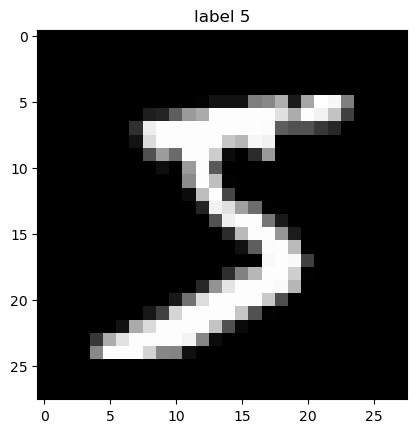

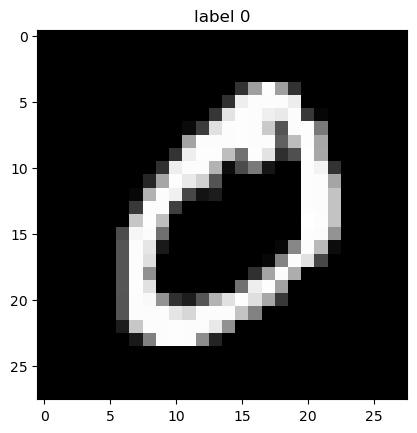

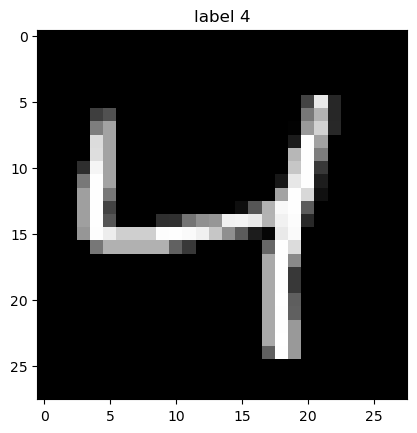

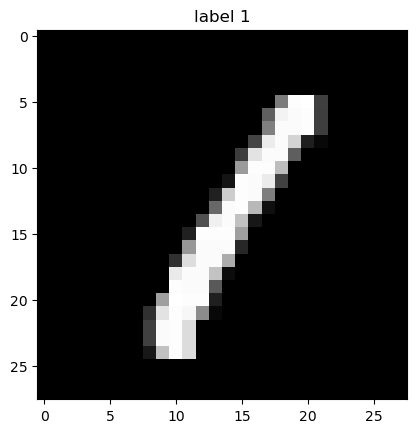

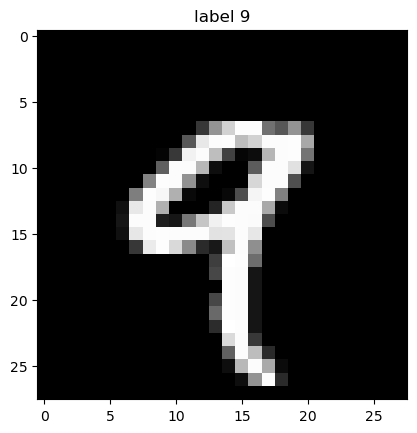

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# load the MINST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

# Display the  first 5 images and lable from training set
for i in range(5):
    plt.imshow(x_train[i],cmap='gray')
    plt.title("label "+ str(y_train[i]))
    plt.show()

In [2]:
# Normalize the images (from [0,255] to [0, 1])
x_train =  x_train.astype ('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:

#Reshape the images to  add the channel dimension
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))


In [4]:
# check the shapes of  the data
print(f'Training data shape: {x_train.shape},Labels shape:{y_train.shape}')
print(f'Test data shape: {x_test.shape}, Labels shape:{y_test.shape}')

Training data shape: (60000, 28, 28, 1),Labels shape:(60000,)
Test data shape: (10000, 28, 28, 1), Labels shape:(10000,)


In [5]:
# one-hot encode the labbeels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [6]:
# Build the CNN model
model =  models.Sequential()

In [7]:
# First convolutional layer with  32 filters,3x3 kernel size, and Relu
 # activation
model.add(layers.Conv2D(32,(3, 3), activation='relu',
input_shape=(28, 28, 1)))


C:\Users\ambad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# second Convolutional layer with 64 filters, 3x3 kernel size, and
# ReLu activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [9]:
# Maxpooling layer to downsample by 2x2
model.add(layers.MaxPooling2D((2, 2)))
      

In [10]:
#Dropout layer for regularization
model.add(layers.Dropout(0.25))
      

In [11]:
#Flatten the feature maps into a 1D feature vector
model.add(layers.Flatten())

In [12]:
# Fully connected dense layer with 128 units and Relu activatiion
model.add(layers.Dense(128, activation='relu'))

In [13]:
#Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

In [14]:
# output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])


In [16]:
#Display a summary of the model
model.summary()
 
model; "sequential_l"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

'sequential_l'

In [17]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 101s 104ms/step - accuracy: 0.8710 - loss: 0.4114 - val_accuracy: 0.9856 - val_loss: 0.0493
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 101s 107ms/step - accuracy: 0.9753 - loss: 0.0843 - val_accuracy: 0.9871 - val_loss: 0.0398
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 103ms/step - accuracy: 0.9814 - loss: 0.0597 - val_accuracy: 0.9878 - val_loss: 0.0359
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 97ms/step - accuracy: 0.9855 - loss: 0.0470 - val_accuracy: 0.9896 - val_loss: 0.0319
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 185s 142ms/step - accuracy: 0.9870 - loss: 0.0411 - val_accuracy: 0.9914 - val_loss: 0.0259


In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f'test accuracy:  {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9895 - loss: 0.0304
test accuracy:  0.9914


In [20]:
history.history['accuracy']


[0.9370499849319458,
 0.9762333035469055,
 0.9820500016212463,
 0.9849666953086853,
 0.986383318901062]

In [21]:
history.history['val_accuracy']

[0.9855999946594238,
 0.9871000051498413,
 0.9878000020980835,
 0.9896000027656555,
 0.9914000034332275]

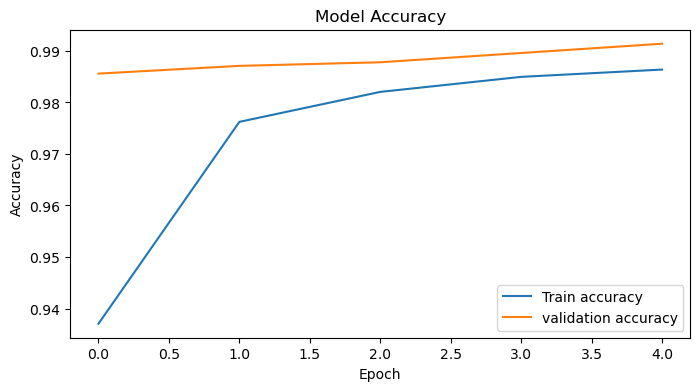

In [24]:
#plot training & validation accuracy values
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label="Train accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

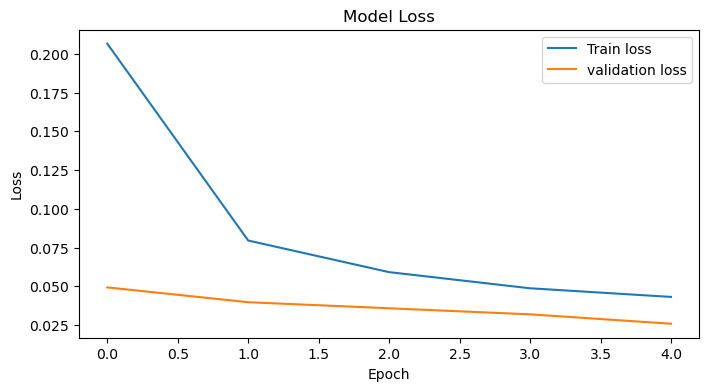

In [25]:
#plot training & validation accuracy values
plt.figure(figsize=(8,4))

plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()